<a href="https://colab.research.google.com/github/Donthula-Harika/Data-Visualization/blob/main/Matplotlib/MATPLOTLIB_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Data Understanding

1. Basic Data Understanding
- What does the dataset look like?
- What are the column names, data types, and basic statistics?
- Are there missing values or anomalies?
- ((No plot required — just inspection using Pandas.)

In [5]:

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

df = pd.read_csv('drive/MyDrive/Data Sets/tip(in).csv')

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The dataset contains restaurant bills, tips, customer details and time info. First rows confirm structure and typical values.

In [8]:
#dataset structure and info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


The dataset has 244 rows and 7 columns with no missing values. Numerical + categorical mix suitable for ML/EDA.

In [9]:
#Columns
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
#Summary Statistics
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Most total bills fall around the mean. Tips scale consistently with bill size — indicates proportional tipping trend.

In [11]:
#Categorical col summary
df.describe(include='object')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


Most visits are likely on weekends & during dinner, indicating peak restaurant business times.

In [12]:
#Missing values
df.isna().sum() # isna() or isnull()


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


No missing values — clean dataset ready for visualization.

In [13]:
# Check duplicates
df.duplicated().sum()

np.int64(1)

In [14]:
# Show duplicate rows
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [21]:
# Show all rows that are duplicates (both original + duplicate)
df[df.duplicated(keep=False)]

,total_bill,tip,sex,smoker,day,time,size,index


Dataset contains 1 duplicate record — identified but not removed yet, since we are currently in exploration phase.



---



# Trend Analysis

- How does a numerical variable (e.g., Sales) change over time or index?
- Are there visible upward or downward trends?
- Are there any noticeable spikes, dips, or seasonality?
- lineplot


**NOTE:**

This dataset does not contain actual timestamps, so a true time-series trend cannot be plotted. Instead, we use observation index as a proxy for time. Additionally, we can sort by day and meal period to simulate a chronological sequence.

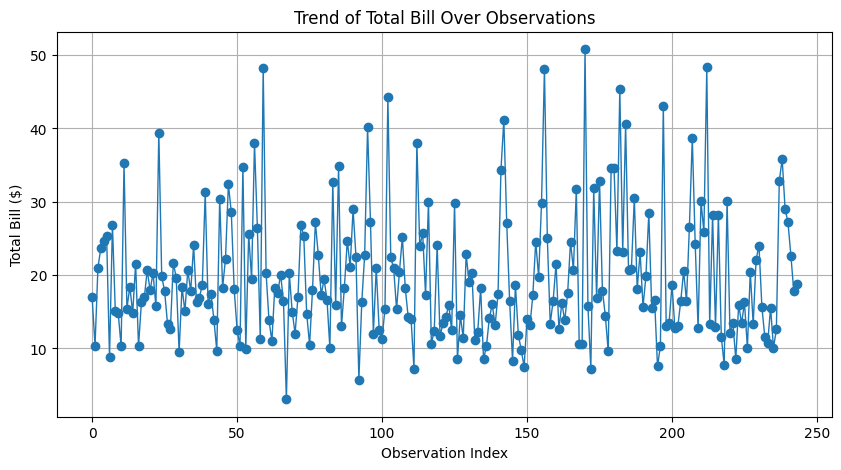

In [16]:
import matplotlib.pyplot as plt

# Create an index column to represent "time/order"
df['index'] = range(len(df))

plt.figure(figsize=(10,5))
plt.plot(df['index'], df['total_bill'], marker='o', linewidth=1)

plt.title("Trend of Total Bill Over Observations")
plt.xlabel("Observation Index")
plt.ylabel("Total Bill ($)")
plt.grid(True)
plt.show()


Total bill values fluctuate throughout observations, showing spikes and dips without a clear linear trend. Higher bills appear occasionally (likely large groups or expensive meals), indicating restaurant traffic includes both low and high spend customers.

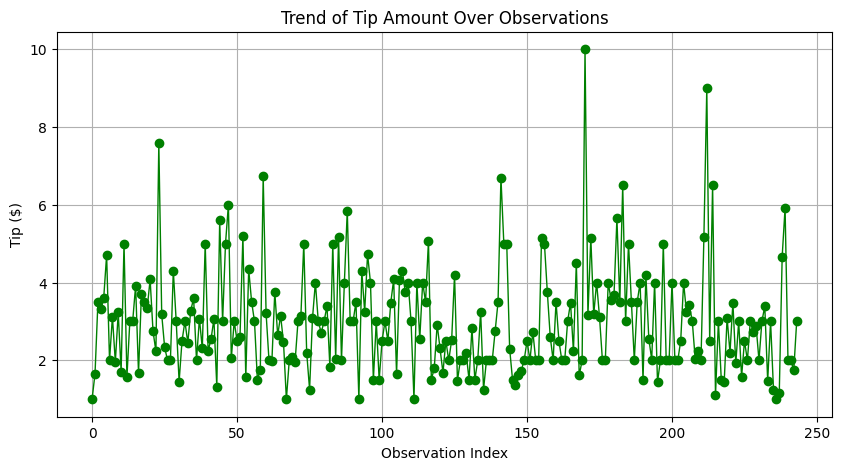

In [17]:
plt.figure(figsize=(10,5))
plt.plot(df['index'], df['tip'], marker='o', linewidth=1, color='green')

plt.title("Trend of Tip Amount Over Observations")
plt.xlabel("Observation Index")
plt.ylabel("Tip ($)")
plt.grid(True)
plt.show()


Tip values follow a similar fluctuating pattern, indicating tipping scales with bill size. No seasonal or periodic pattern — tips vary per customer behavior.

**Learnings**
- Trend Analysis: Visualized numeric variable over ordered observations
- Inference: Observed spikes, dips, irregular variation
- ML Insight: Such patterns may require smoothing or feature engineering later






# Category Comparison

- Which category (e.g., Region, Product, Department) contributes most to the total value?
- Which categories have lower contributions?
- How big is the gap
between categories?
- Use Bar Plot


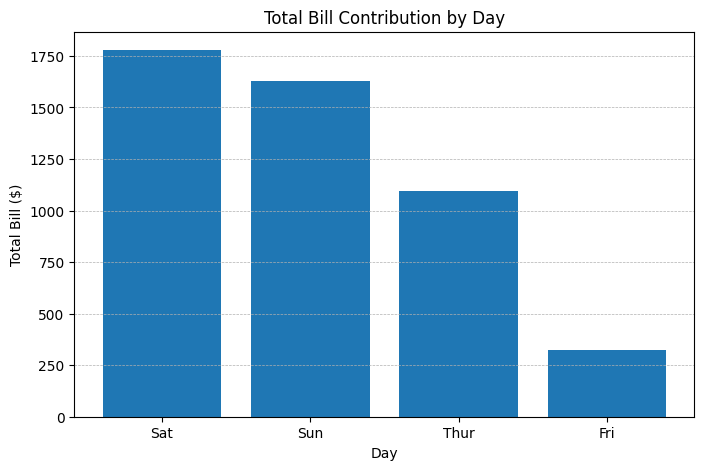

In [18]:
import matplotlib.pyplot as plt

# Group by day and get total sum or mean — here sum
category_data = df.groupby('day')['total_bill'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(category_data.index, category_data.values)

plt.title("Total Bill Contribution by Day")
plt.xlabel("Day")
plt.ylabel("Total Bill ($)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Most revenue is generated on weekends (Sat & Sun), indicating peak dining activity during weekends. Weekdays contribute less. This aligns with restaurant business patterns — higher customer flow on weekends.

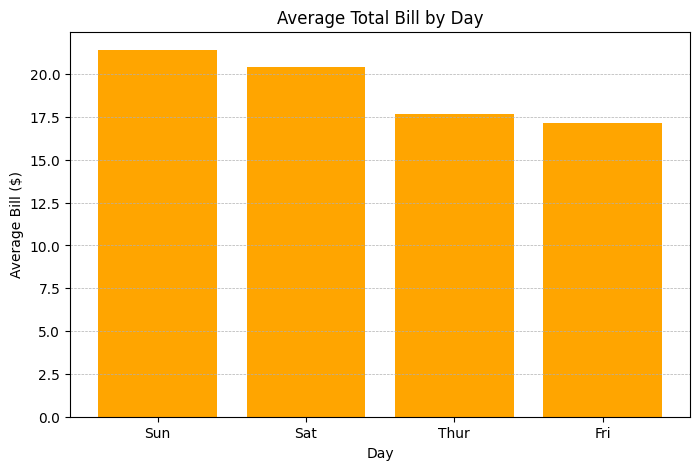

In [19]:
avg_bill = df.groupby('day')['total_bill'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(avg_bill.index, avg_bill.values, color='orange')

plt.title("Average Total Bill by Day")
plt.xlabel("Day")
plt.ylabel("Average Bill ($)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Average bill is highest on weekends, showing customers tend to spend more during weekend meals.

Bar plot helps visually compare category contributions. In this case, weekend days show the highest restaurant bill totals, meaning weekend traffic is stronger.

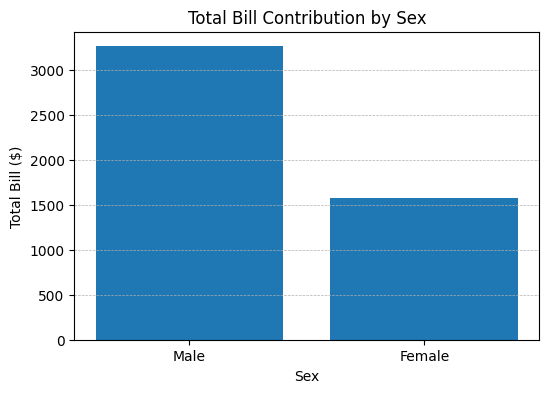

In [20]:
#Total Bill by Sex
sex_bill = df.groupby('sex')['total_bill'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(sex_bill.index, sex_bill.values)

plt.title("Total Bill Contribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Total Bill ($)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Males contribute slightly more total bill revenue than females. This may reflect group sizes or dining behavior differences, not necessarily count differences.

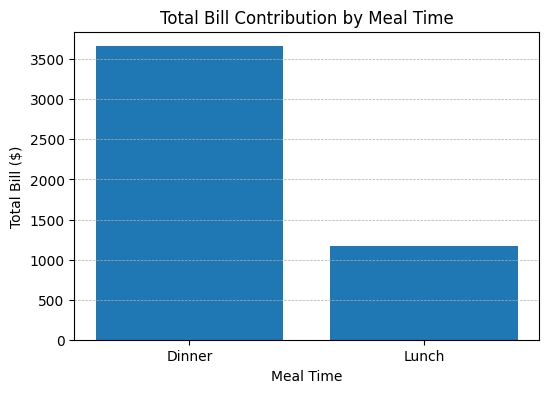

In [22]:
#Total Bill by Time (Lunch vs Dinner)
time_bill = df.groupby('time')['total_bill'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(time_bill.index, time_bill.values)

plt.title("Total Bill Contribution by Meal Time")
plt.xlabel("Meal Time")
plt.ylabel("Total Bill ($)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Dinner contributes significantly more revenue than lunch. This suggests dinner hours attract more customers or higher spending.

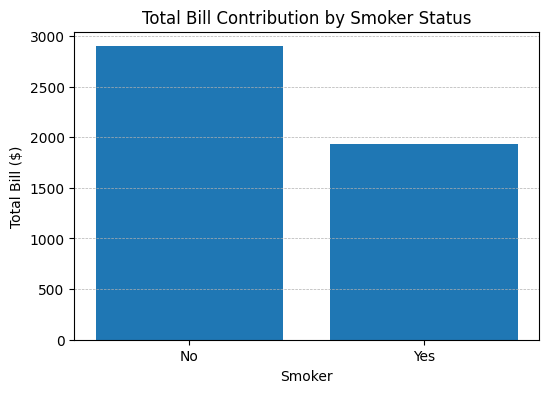

In [23]:
smoker_bill = df.groupby('smoker')['total_bill'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(smoker_bill.index, smoker_bill.values)

plt.title("Total Bill Contribution by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Total Bill ($)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Non-smokers contribute more to total revenue than smokers. This could be due to preference, group size, or dining duration — not smoking behavior alone.

General insight:

Across categories, weekend days and dinner time dominate spending. Male groups and non-smokers show slightly higher contributions. This helps understand customer segments and revenue drivers.



---



# Value Distribution

- How are values in a numerical column distributed?
- Are they concentrated around certain ranges or spread out evenly?
- Are there extreme values?
- histplot


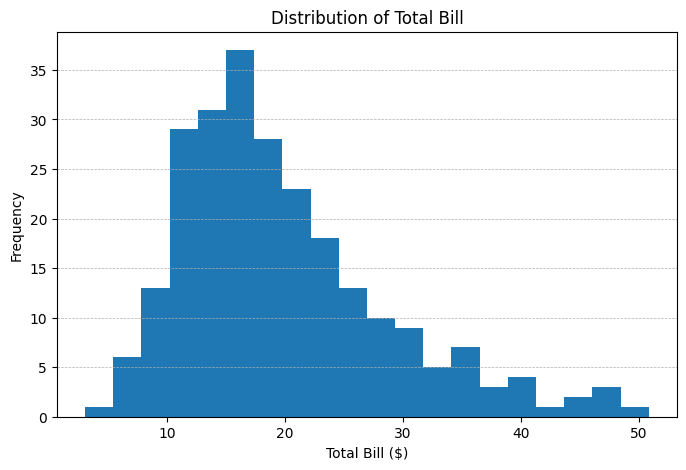

In [24]:
#Histogram for Total Bill
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['total_bill'], bins=20)  # 20 bins for clarity
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Most total bills fall between 10 and 25 dollars, showing a right-skewed distribution with a few high-value bills above $40. This indicates typical spending is moderate, with occasional large groups or premium meals raising the upper range.

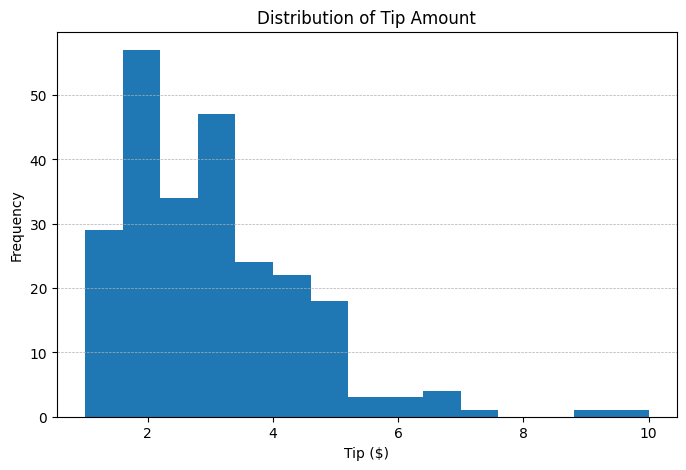

In [25]:
#Histogram for Tip Amount
plt.figure(figsize=(8,5))
plt.hist(df['tip'], bins=15)
plt.title("Distribution of Tip Amount")
plt.xlabel("Tip ($)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Tip values are concentrated between 2 and 4 dollars. Very few tips exceed $6, suggesting typical tipping behavior is relatively modest with occasional high tips.



---



# Relationship Between Variables

- How does one numerical variable relate to another (e.g., Sales vs Profit)?
- Is there any visible correlation?
- Are there outliers?
- Sccatter plot


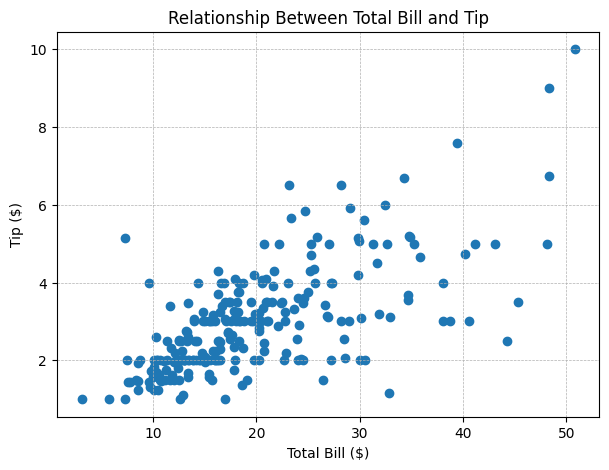

In [27]:

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df['total_bill'], df['tip'])

plt.title("Relationship Between Total Bill and Tip")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


The plot shows a positive relationship between total bill and tip — as the bill increases, tips also tend to increase. However, the relationship is not perfectly linear; smaller bill amounts show more variation in tipping behavior. A few high-bill points show relatively lower tips, indicating occasional under-tipping.

- There is a visible positive correlation between total bill and tip. Higher bills tend to result in higher tips, although there is some variation in tipping behavior across customers.
- Yes, outliers are present. A few customers with high bills tipped unusually low, and a few mid-range bills received unusually high tips. These points deviate from the overall trend.

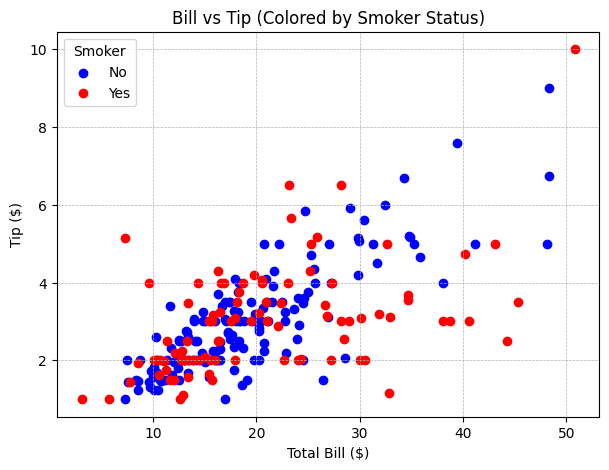

In [28]:
#Color points by smoker status
colors = {'Yes':'red', 'No':'blue'}

plt.figure(figsize=(7,5))
for s in df['smoker'].unique():
    temp = df[df['smoker'] == s]
    plt.scatter(temp['total_bill'], temp['tip'], label=s, color=colors[s])

plt.title("Bill vs Tip (Colored by Smoker Status)")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend(title="Smoker")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


Smokers and non-smokers show similar correlation trends, with no drastic difference in tipping pattern.

# Outliers & Spread

- How spread out are values in a numerical column?
- Are there any outliers?
- How does this spread differ across categories?
- boxplot

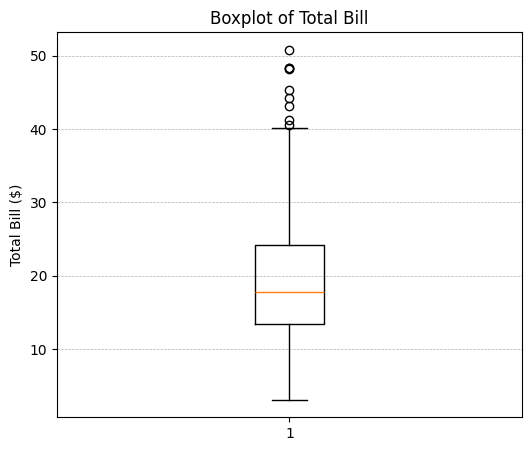

In [30]:
#Boxplot for Total Bill
import matplotlib.pyplot as plt


plt.figure(figsize=(6,5))
plt.boxplot(df['total_bill'])

plt.title("Boxplot of Total Bill")
plt.ylabel("Total Bill ($)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Most total bills lie between 10 and 25 dollars. A few bills appear significantly higher ($40+), indicating outliers — likely large groups or expensive meals. The distribution is slightly right-skewed.

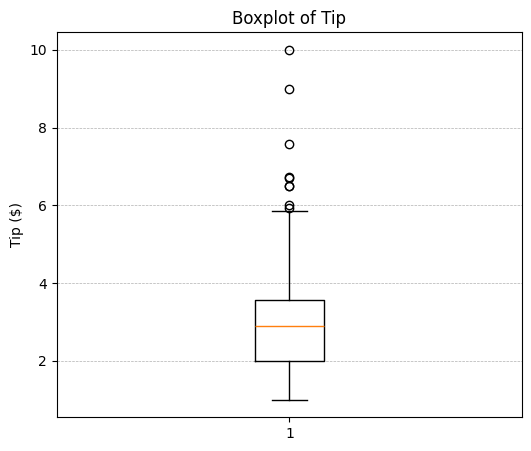

In [31]:
#Boxplot for Tip
plt.figure(figsize=(6,5))
plt.boxplot(df['tip'])

plt.title("Boxplot of Tip")
plt.ylabel("Tip ($)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Tip values mainly fall between 2 and 4 dollars. Tips above ~$7 appear as outliers, revealing occasional very generous tipping.

/tmp/ipython-input-846998991.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bill_by_smoker, labels=['Smoker','Non-Smoker'])


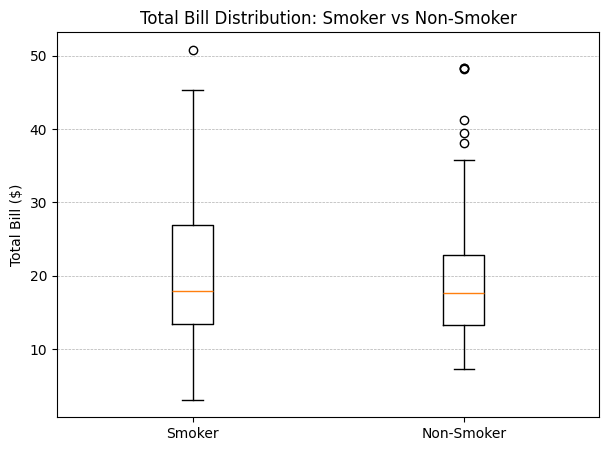

In [33]:
# by Smoker Category
plt.figure(figsize=(7,5))
bill_by_smoker = [df[df['smoker']=='Yes']['total_bill'], df[df['smoker']=='No']['total_bill']]
plt.boxplot(bill_by_smoker, labels=['Smoker','Non-Smoker'])

plt.title("Total Bill Distribution: Smoker vs Non-Smoker")
plt.ylabel("Total Bill ($)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


Both smokers and non-smokers show similar spending spread. Non-smokers have slightly higher upper-range values, suggesting larger or more premium dining groups.


---



# Proportions

- How is the dataset divided among different categories?
- Which category has the largest share?
- Is the distribution balanced or skewed?


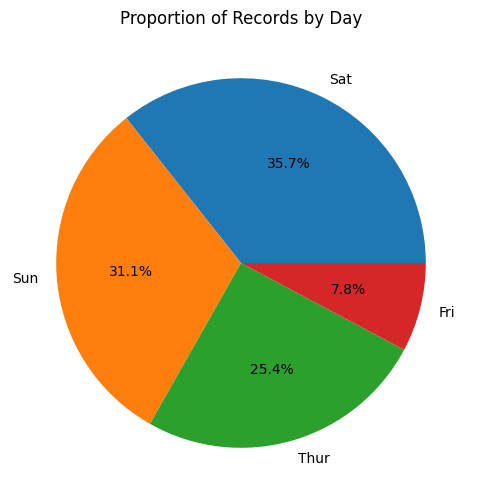

In [35]:
#Proportion by Day
import matplotlib.pyplot as plt

day_counts = df['day'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%')
plt.title("Proportion of Records by Day")
plt.show()


- Most visits occur on weekends (Sat & Sun), suggesting higher restaurant traffic during weekends. Thursday and Friday have fewer entries, indicating lower weekday visits.
- Skewed — weekend days (Saturday and Sunday) have more records than weekdays. The restaurant sees more traffic on weekends.

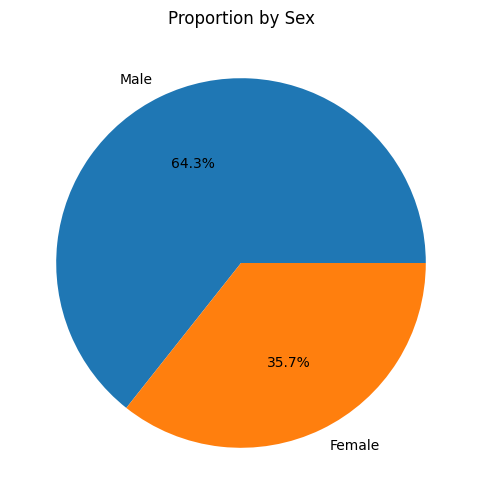

In [36]:
#Proportion by Sex
sex_counts = df['sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title("Proportion by Sex")
plt.show()


- The dataset has slightly more male customers than female customers, indicating a mild gender imbalance in visits.
- Slightly skewed — males slightly outnumber females, but the gap is not very large. The distribution is somewhat balanced.

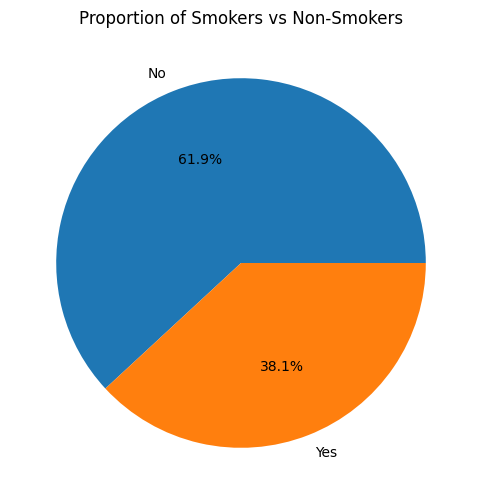

In [37]:
#Proportion by Smoker Status
smoker_counts = df['smoker'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title("Proportion of Smokers vs Non-Smokers")
plt.show()


- Non-smokers form a larger portion of the dataset. Smoking customers are fewer, suggesting smoking audience is smaller at this restaurant.
- Skewed — non-smokers clearly dominate the dataset. More non-smoker groups visit the restaurant than smoker groups.

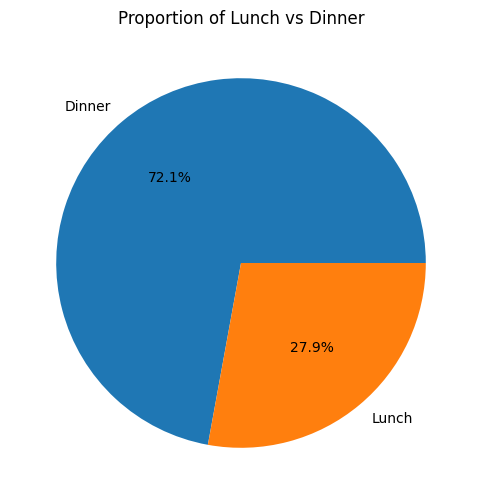

In [38]:
#Lunch vs Dinner
time_counts = df['time'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%')
plt.title("Proportion of Lunch vs Dinner")
plt.show()


- Dinner accounts for a significantly larger share than lunch, indicating the restaurant is busier during evening service.
- Strongly skewed — dinner visits significantly exceed lunch visits. Customers mostly dine during evening hours.

Pie charts show distribution across key categories. Dinner, weekends, males, and non-smokers represent the majority presence in this dataset, indicating peak business behavior and customer segmentation patterns.

Understanding category proportions helps restaurants tailor menu pricing, staff allocation, and marketing campaigns — such as promoting weekday lunch deals to balance traffic.

# Multiple Visuals in One View

- How do multiple insights look side by side?
- Can we spot patterns when trend, distribution, and relationships are combined visually?
- Which plot gives the clearest story?
- subplots

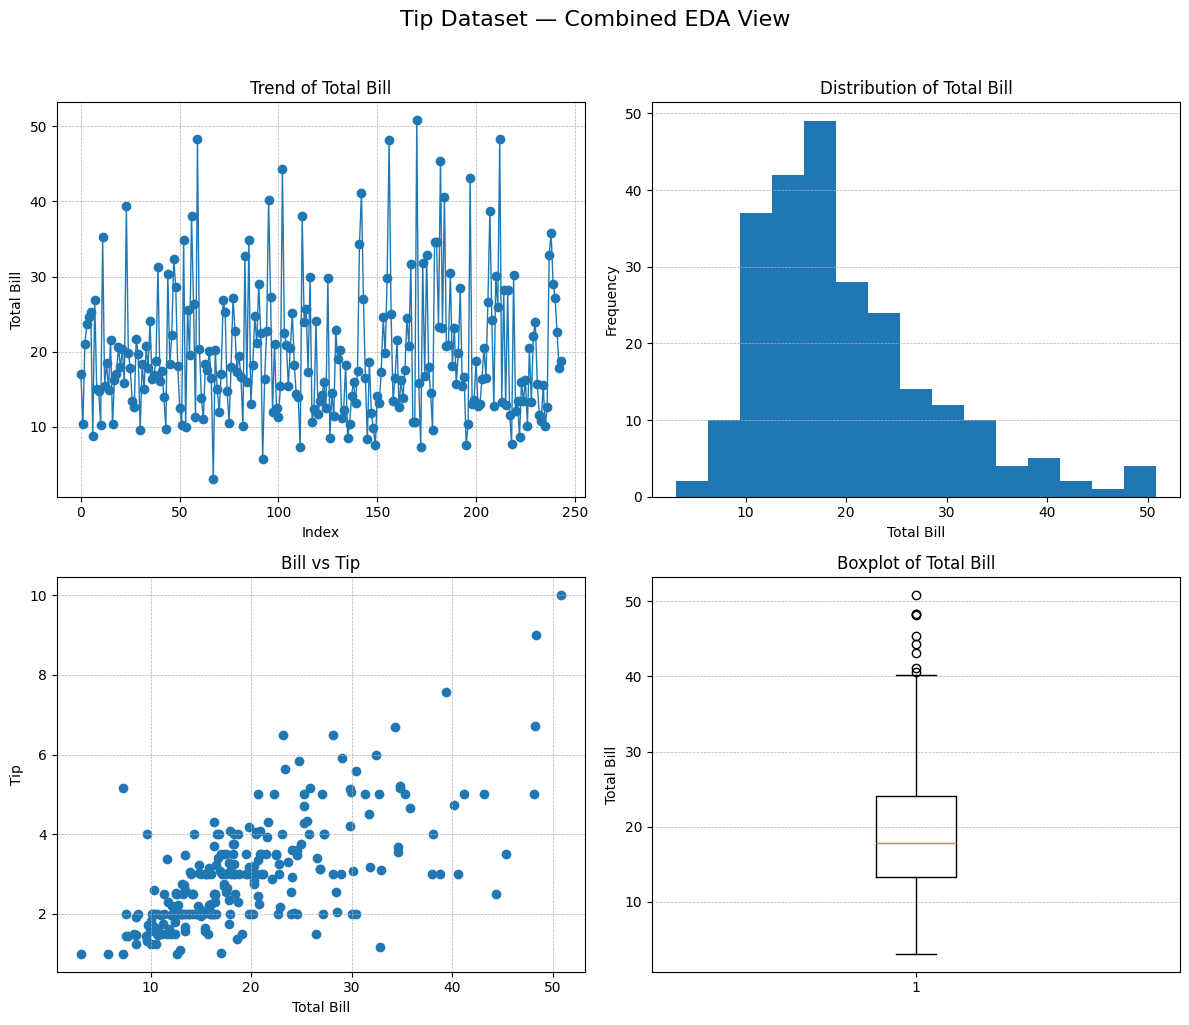

In [41]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(12,10))
plt.suptitle("Tip Dataset — Combined EDA View", fontsize=16, y=1.02)

# 1 — Line Plot (Total Bill Trend)
plt.subplot(2,2,1)
plt.plot(df.index, df['total_bill'], marker='o', linewidth=1)
plt.title("Trend of Total Bill")
plt.xlabel("Index")
plt.ylabel("Total Bill")
plt.grid(True, linestyle='--', linewidth=0.5)

# 2 — Histogram (Distribution)
plt.subplot(2,2,2)
plt.hist(df['total_bill'], bins=15)
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# 3 — Scatter Plot (Bill vs Tip)
plt.subplot(2,2,3)
plt.scatter(df['total_bill'], df['tip'])
plt.title("Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.grid(True, linestyle='--', linewidth=0.5)

# 4 — Box Plot (Spread & Outliers)
plt.subplot(2,2,4)
plt.boxplot(df['total_bill'])
plt.title("Boxplot of Total Bill")
plt.ylabel("Total Bill")
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


The multi-plot view gives a complete picture of total bill behavior:

- The line plot shows random fluctuations in bill amounts across observations.
- The histogram indicates most bills fall between $10–$25.
- The scatter plot reveals a positive relationship between bill and tip.
- The box plot highlights a right-skewed spread with higher-value outliers.

Overall, customers mostly have moderate bills with occasional large orders, and tips increase with bill amount.